<a href="https://colab.research.google.com/github/polankisravya/CICD-pipeline/blob/main/titanic_classification_codealpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🚢 Titanic Classification - CodeAlpha Data Science Internship

This notebook contains the solution to Task 1 of the **CodeAlpha Data Science Internship**: building a machine learning model to predict whether a passenger survived the Titanic disaster.


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### 🔍 Load the Titanic Dataset

In [ ]:

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 🧼 Handle Missing Values

In [ ]:

df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:

df.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.dropna(inplace=True)


<ipython-input-4-7e5a23ab439e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-4-7e5a23ab439e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

### 🔁 Encode Categorical Variables

In [ ]:

label_encoders = {}
for column in ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,1


### 📊 Feature Selection and Splitting Dataset

In [ ]:

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 🤖 Train a Random Forest Model

In [ ]:

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

### 📈 Evaluate the Model

In [ ]:

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### 🌟 Feature Importance

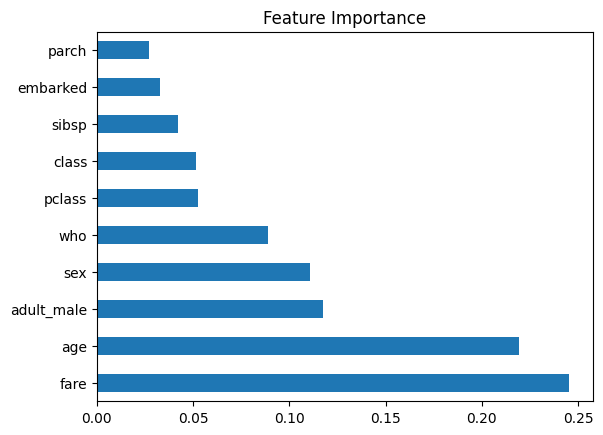

In [ ]:

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()
